In [1]:
import importlib
import utils
importlib.reload(utils)
from utils import load_data, CLASSES, data_augmentation, evaluate_model
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (
    Conv2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Activation,
    MaxPool2D,
    BatchNormalization,
    Dropout,
)
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Reading Data

In [2]:
IMG_SIZE = (256, 256)
data, labels = load_data("./Dataset", IMG_SIZE=IMG_SIZE)
print('Image sizes:', IMG_SIZE)

Image sizes: (256, 256)


## Splitting Data

In [3]:
X_train, X_val, y_train, y_val   = train_test_split(data, labels,     test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train = np.array(X_train)
X_val   = np.array(X_val)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)


## Preprocessing

In [4]:
# apply augmentation on training data
X_train_aug, y_train_aug = data_augmentation(X_train, y_train)

# apply augmentation on validation data
X_val_aug, y_val_aug = data_augmentation(X_val, y_val)

## Model

### Model Building

In [5]:
model = Sequential()
# 1st layer (CONV + pool + batchnorm)
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    )
)
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 2nd layer (CONV + pool + batchnorm)
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(BatchNormalization())
# layer 3 (CONV + batchnorm)
model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
# layer 4 (CONV + batchnorm)
model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
# layer 5 (CONV + batchnorm)
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(Flatten())
# layer 6 (Dense layer + dropout)
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5))
# layer 7 (Dense layers)
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5))
# layer 8 (softmax output layer)
model.add(Dense(units=2, activation="softmax"))

2023-05-20 23:17:24.991026: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-20 23:17:24.991073: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ahmed-Nitro-AN515-44): /proc/driver/nvidia/version does not exist
2023-05-20 23:17:24.992730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 23:17:25.150009: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2023-05-20 23:17:25.191218: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2023-

In [9]:
# describe the model breifly (layers, parameters, ...)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0

### Model Training

In [6]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    X_train_aug, y_train_aug,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_aug, y_val_aug)
)

Epoch 1/50


2023-05-20 23:17:25.332356: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 260702208 exceeds 10% of free system memory.
2023-05-20 23:17:25.908378: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.


21/21 [==============================] - 26s 1s/step - loss: 5.9773 - accuracy: 0.6456 - val_loss: 22.3366 - val_accuracy: 0.5108
Epoch 2/50
21/21 [==============================] - 23s 1s/step - loss: 2.5428 - accuracy: 0.7821 - val_loss: 25.3890 - val_accuracy: 0.4703
Epoch 3/50
21/21 [==============================] - 22s 1s/step - loss: 1.8429 - accuracy: 0.8039 - val_loss: 14.6255 - val_accuracy: 0.4865
Epoch 4/50
21/21 [==============================] - 23s 1s/step - loss: 1.5599 - accuracy: 0.8167 - val_loss: 5.3394 - val_accuracy: 0.6054
Epoch 5/50
21/21 [==============================] - 22s 1s/step - loss: 1.0542 - accuracy: 0.8499 - val_loss: 3.0725 - val_accuracy: 0.5324
Epoch 6/50
21/21 [==============================] - 22s 1s/step - loss: 1.0120 - accuracy: 0.8582 - val_loss: 2.9084 - val_accuracy: 0.6486
Epoch 7/50
21/21 [==============================] - 22s 1s/step - loss: 0.8804 - accuracy: 0.8710 - val_loss: 1.7829 - val_accuracy: 0.7486
Epoch 8/50
21/21 [==========

## Evaluation

Accuracy:  0.8324324324324325
F1 score:  0.8242145593869732
Precision:  0.8732690741243552
Recall:  0.8224841660802251
Omission error:  0.17751583391977488
Commission error:  0.12673092587564483


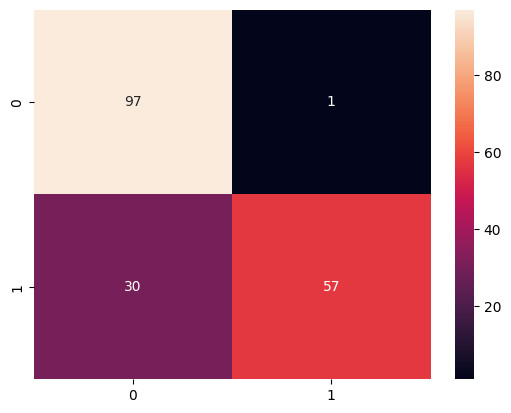

In [7]:
evaluate_model(model, X_val, y_val)

### Another Architecture

In [8]:
# model = Sequential()
# # 1st layer (CONV + pool + batchnorm)
# model.add(
#     Conv2D(
#         filters=96,
#         kernel_size=(11, 11),
#         strides=(4, 4),
#         padding="valid",
#         input_shape=(227, 227, 3),
#     )
# )
# model.add(Activation("relu"))
# model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
# model.add(BatchNormalization())
# # 2nd layer (CONV + pool + batchnorm)
# model.add(
#     Conv2D(
#         filters=256,
#         kernel_size=(5, 5),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="valid"))
# model.add(BatchNormalization())
# # layer 3 (CONV + batchnorm)
# model.add(
#     Conv2D(
#         filters=384,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# # layer 4 (CONV + batchnorm)
# model.add(
#     Conv2D(
#         filters=384,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# # layer 5 (CONV + batchnorm)
# model.add(
#     Conv2D(
#         filters=256,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="valid"))
# model.add(Flatten())
# # layer 6 (Dense layer + dropout)
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# # layer 7 (Dense layers)
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# # layer 8 (softmax output layer)
# model.add(Dense(units=2, activation="softmax"))